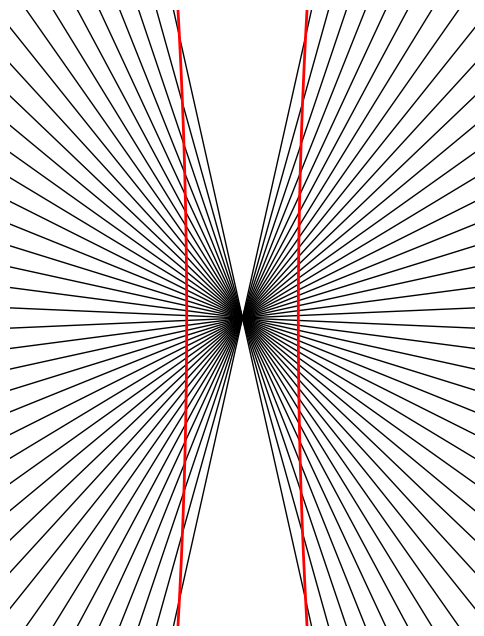

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

def generate_hering_illusion(image_size=500, num_radial_lines=40, num_vertical_lines=2, 
                             vertical_line_spacing=200, curve_strength=0.0001, fractional_gap=2):
    """
    Generates a Hering illusion with adjustable parameters.
    
    Parameters:
        image_size (int): Size of the square image in pixels.
        num_radial_lines (int): Number of radial background lines.
        num_vertical_lines (int): Number of "straight" vertical lines.
        vertical_line_spacing (int): Distance between vertical lines.
        curve_strength (float): Coefficient determining how much the vertical lines curve to compensate for the illusion.
        fractional_gap (float): gap in to leave in the radial lines. default to 2, which leaves no gap. > 2 will leave a gap.
    """
    fig, ax = plt.subplots(figsize=(6, 8))
    ax.set_xlim(-image_size//2, image_size//2)
    ax.set_ylim(-image_size//2, image_size//2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    # Draw radial lines
    angles = np.linspace(-np.pi/fractional_gap, np.pi/fractional_gap, num_radial_lines)
    for angle in angles:
        x = np.array([-image_size//2, image_size//2])
        y = np.tan(angle) * x
        ax.plot(x, y, color='black', lw=1)

    # Draw "compensated" vertical lines
    y_values = np.linspace(-image_size//2, image_size//2, 300)
    for i in range(num_vertical_lines):
        x_offset = -vertical_line_spacing//2 + i * vertical_line_spacing
        x_values = parity(i)*curve_strength * (y_values ** 2) + x_offset  # Parabolic inward curve
        ax.plot(x_values, y_values, color='red', lw=2)

    plt.show()

def parity(x):
    return 1 if x % 2 != 0 else -1

# Generate the illusion with adjustable parameters
@interact(
    image_size=widgets.IntSlider(value=500, min=100, max=1000, step=50, description='Image Size'),
    num_radial_lines=widgets.IntSlider(value=40, min=10, max=100, step=5, description='Radial Lines'),
    num_vertical_lines=widgets.IntSlider(value=2, min=1, max=10, step=1, description='Vertical Lines'),
    vertical_line_spacing=widgets.IntSlider(value=200, min=50, max=500, step=10, description='Line Spacing'),
    curve_strength=widgets.FloatSlider(value=0.0001, min=0.00001, max=0.001, step=0.00001, description='Curve Strength'),
    fractional_gap=widgets.FloatSlider(value=2, min=1, max=3, step=0.1, description='Fractional Gap')
)
def update_hering_illusion(image_size, num_radial_lines, num_vertical_lines, vertical_line_spacing, curve_strength, fractional_gap):
    generate_hering_illusion(image_size, num_radial_lines, num_vertical_lines, vertical_line_spacing, curve_strength, fractional_gap)
